<a href="https://colab.research.google.com/github/gsasikiran/Semantic-similarity/blob/master/analyzing_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install bert-embedding
!pip3 install allennlp

In [2]:
!pip3 install --upgrade numpy

  Using cached https://files.pythonhosted.org/packages/87/2d/e4656149cbadd3a8a0369fcd1a9c7d61cc7b87b3903b85389c70c989a696/numpy-1.16.4-cp36-cp36m-manylinux1_x86_64.whl
ERROR: mxnet 1.4.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.16.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bert-embedding 1.0.1 has requirement numpy==1.14.6, but you'll have numpy 1.16.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [14]:

import scipy

import numpy as np
import nltk
nltk.download('punkt')

import tarfile

from nltk.tokenize import word_tokenize
from bert_embedding import BertEmbedding
from allennlp.commands.elmo import ElmoEmbedder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
class PreProcess:
  
  def __init__(self, first_sentence, second_sentence):
    self.sentence_1 = first_sentence
    self.sentence_2 = second_sentence
    self.tokenized_sent_1 = word_tokenize(self.sentence_1)
    self.tokenized_sent_2 = word_tokenize(self.sentence_2)
    
  def get_elmo_embedding(self):
    '''Creates word embeddings taken from ELMo language representation
    returns: word embeddings'''
    elmo = ElmoEmbedder()
    elmo_embedding_1 = elmo.embed_sentence(self.tokenized_sent_1)
    elmo_embedding_2 = elmo.embed_sentence(self.tokenized_sent_2)
    return elmo_embedding_1, elmo_embedding_2

#   We are creating two functions for returning word arrays, as embeddings of all models are not of similar format
  def create_elmo_word_arrays(self, embedding):
    word_array = []
    for i in range(len(embedding[2])):
      word_array.append(embedding[2][i])
    return word_array
    
  def get_bert_embedding(self):
    '''Creates word embeddings taken from ELMo language representation
    param: 
    returns: '''
    bert_embedding_1  = BertEmbedding().embedding(sentences = self.tokenized_sent_1)
    bert_embedding_2  = BertEmbedding().embedding(sentences = self.tokenized_sent_2)
    return bert_embedding_1, bert_embedding_2
    

  def create_bert_word_arrays(self, embedding):
    '''
    param:
    embedding: 
    returns: 
    '''
    word_array = []
    for i in range(len(embedding)):
      word_array.append(embedding[i][1][0])
    return word_array

  def cosine_similarity_matrix(self, array_1, array_2):
    '''
    param:
    array_1: array
      Array of first sentence word embeddings
    array_2: array
      Array of second sentence word embeddings
    returns: array
      Similarity matrix of words in two sentences
    '''
    matrix = np.zeros((len(array_1), len(array_2)))

    for i in range(0, len(array_1)):
      for j in range(0, len(array_2)):
        matrix[i][j]= scipy.spatial.distance.cosine(array_1[i], array_2[j])
    return matrix.T       


In [0]:
def main(first_input, second_input):
  preprocess = PreProcess(first_input, second_input)
  print("On what basis do you need the similar words?")
  num = int(input('1 : BERT embeddings, 2 : ELMo embeddings'))
  if num == 1:
    first_embedding, second_embedding = preprocess.get_bert_embedding()
    word_array_1, word_array_2 = preprocess.create_bert_word_arrays(first_embedding), preprocess.create_bert_word_arrays(second_embedding)  
  elif num ==2:
    first_embedding, second_embedding = preprocess.get_elmo_embedding()
    word_array_1, word_array_2 = preprocess.create_elmo_word_arrays(first_embedding), preprocess.create_elmo_word_arrays(second_embedding)  

  return preprocess.cosine_similarity_matrix(word_array_1, word_array_2)
  
    

In [0]:
def plot_similarity_matrix(first_sentence, second_sentence):
  x_labels, y_labels = word_tokenize(first_sentence), word_tokenize(second_sentence)
  similarity_matrix = main(first_sentence, second_sentence)
#   print(similarity_matrix)
  sns.heatmap(similarity_matrix, vmin=0, vmax=1, xticklabels=x_labels, yticklabels=y_labels, cmap="YlGnBu")
  plt.show()

def get_similar_words(sentence_1, sentence_2):
  '''Prints similar word from second sentence for each word in the first sentence
  '''
  token_1 = word_tokenize(sentence_1)
  token_2 = word_tokenize(sentence_2)
  
  similarity_matrix = main(sentence_1, sentence_2)
  
#   print(similarity_matrix)
  similar_word_dict = {}
  for row in range(0,len(similarity_matrix[0])):
    
    min_val = min(similarity_matrix.T[row]) #Here min value of transpose is found. To understand it print similarity matrix and find the logic
    index = (np.where(similarity_matrix.T[row] == min_val))[0]
    similar_word_list = []
    
    for i in range(0,len(index)):
      similar_word_list.append(token_2[index[i]])
    similar_word_dict[token_1[row]] = similar_word_list
    
  print(similar_word_dict)

On what basis do you need the similar words?
1 : BERT embeddings, 2 : ELMo embeddings1
{'A': ['The'], 'man': ['woman'], 'plays': ['plays'], 'a': ['The'], 'guitar': ['football']}
On what basis do you need the similar words?
1 : BERT embeddings, 2 : ELMo embeddings1


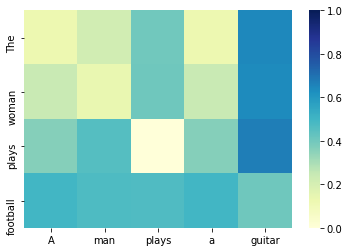

In [18]:
if __name__ == '__main__':
  input_1 = "A man plays a guitar"
  input_2 = "The woman plays football"
  get_similar_words(input_1, input_2)
  plot_similarity_matrix(input_1, input_2)

<b> Note:</b> 
* The lighter the map is the more similar the words are...
* Following is the question from "Mohler dataset."

Q3: What are the main advantages associated with object-oriented programming?
On what basis do you need the similar words?
1 : BERT embeddings, 2 : ELMo embeddings1
{'Abstraction': ['abstraction'], 'and': ['and'], 'reusability': ['re-usability'], '.': ['.']}
On what basis do you need the similar words?
1 : BERT embeddings, 2 : ELMo embeddings1


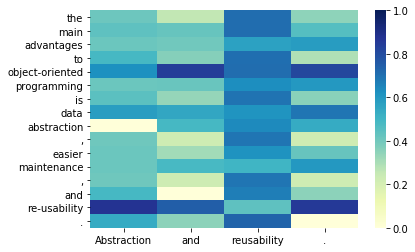

In [19]:
print ('Q3: What are the main advantages associated with object-oriented programming?')

expected_ans_3 = 'Abstraction and reusability.'
actual_ans_31 = 'the main advantages to object-oriented programming  is data abstraction, easier maintenance, and re-usability.'

get_similar_words(expected_ans_3, actual_ans_31)
plot_similarity_matrix(expected_ans_3, actual_ans_31)